# Kaggle Bike Demand Prediction

Statement of the Problem- To predict the demand of bikes of Capital BikesShare Works(https://www.capitalbikeshare.com/)

To download the data, Please follow the link(https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [2]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
#STEP1
dataset=pd.read_csv('hour.csv')
dataset

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Description about the data set and features

1) Index- It is serial number to identify the right car.

2) Date - Date of the rental

3) Season- Season has four value as 1,2,3,4
    1-Spring 2-Summer 3-Fall 4-Winter
    
4) Year-
    0-2011 1-2012
    
5) Month- It goes from January to December

6) Hours- It goes from 0 to 23

7) Holiday- It is a binary value
    1-Yes 0-No
    
8)Weekdays- 0 to 6 for Sunday to Saturday

9)Working Day-
    0-No 1-Yes
    
10)Weather-
    1-Clear, Few clods, Partly Clouds
    2-Mist+Cloudy, Mist+broken clouds, Mist+Fewclouds, Mist
    3-Light Snow, Light Rain, Thunderstrom+scattered clods, Light Rain+scattered clouds
    4- Heavy Rain+ice pallets, Thunderstorm+Mist, Snow+Fog
    
11) Temp- Normalised temperature in Celsius

12) atenp- It is described as feeling like temperature.

13) Humidity- It is a normalised humidity.

14) windspeed- wind speed on your day

15) casual- it is a type of user i.e. casual= non registered


16) registered- It is a type of user  i.e. registered user

17) cnt- total  of casual and registered

Steps requied to solve the bike sharing prediction problem

1) Read the data

2) Preliminary analysis of the data and features selection.

3) Visualise the data

4) Check Multiple Linear Regression Assumption
   1) Normality
   2) Linear correlation
   3) Multicollinearity
   4) Autocorrelation
   5) sample size
   
5) drop irrelevant features

6) Create/modify more features

7) Create Dummy variables

8)Train and Test Split

9)Fit and score the model

10) present the results

In [4]:
dataset.isnull().sum()

index         0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

In [5]:
#STEP2
bikes_prep_data=dataset.copy()
bikes_prep=bikes_prep_data.drop(['index','date','casual','registered'],axis=1)

In [6]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [7]:
bikes_prep.isnull().sum()
#Basic Check of missing value

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

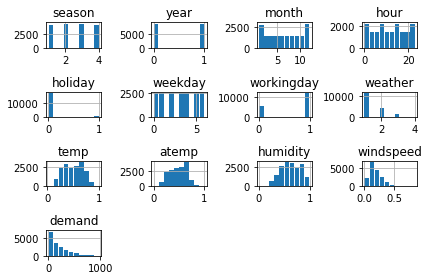

In [8]:
#Visualise the data
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

In [9]:
#Visualise the continuous features V/S  demand

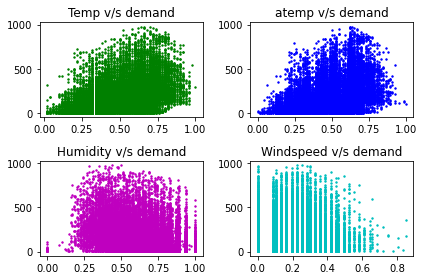

In [10]:
plt.subplot(2,2,1)
plt.title('Temp v/s demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=2, c='g')

plt.subplot(2,2,2)
plt.title('atemp v/s demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity v/s demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed v/s demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=2, c='c')

plt.tight_layout()

After visualising the plot of temp and atemp, there would be high chances for the colrelation as in the both graphdemand increase when temp and temp increse.

Data visualisation for catogerical variable

In [11]:
#Plot visualisation for catogerical variable

In [12]:
cat_list=bikes_prep['season'].unique() #create a list of unique season's values
cat_list

array([1, 2, 3, 4], dtype=int64)

In [13]:
cat_average=bikes_prep.groupby('season').mean()['demand'] #Created average demand per season using groupby
cat_average

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: demand, dtype: float64

<BarContainer object of 4 artists>

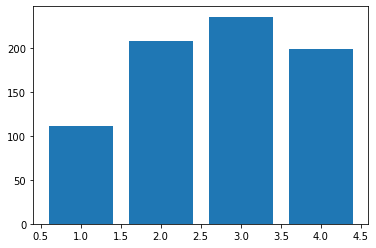

In [14]:
plt.bar(cat_list,cat_average)

In [15]:
#create a 3 * 3 subplot

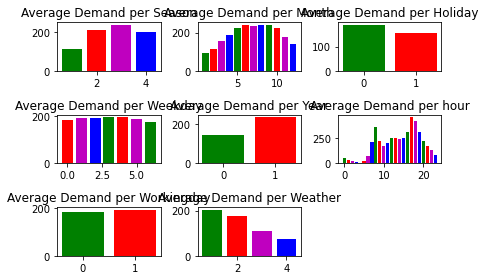

In [16]:
colours=['g','r','m','b']
plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list=bikes_prep['season'].unique()
cat_average=bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list,cat_average,color=colours)

plt.subplot(3,3,2)
plt.title('Average Demand per Month')
cat_list=bikes_prep['month'].unique()
cat_average=bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list,cat_average,color=colours)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list=bikes_prep['holiday'].unique()
cat_average=bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_average,color=colours)

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list=bikes_prep['weekday'].unique()
cat_average=bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_average,color=colours)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list=bikes_prep['year'].unique()
cat_average=bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list,cat_average,color=colours)

plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list=bikes_prep['hour'].unique()
cat_average=bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_average,color=colours)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list=bikes_prep['workingday'].unique()
cat_average=bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_average,color=colours)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list=bikes_prep['weather'].unique()
cat_average=bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_average,color=colours)
plt.tight_layout()

Features to be dropped-

1)weekday- There is no significant change in demand. It won't affect the prediction of bike so we can drop it.

2)year

3)working day

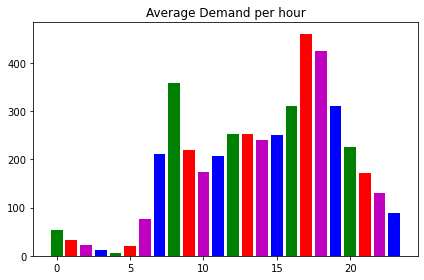

In [17]:
colours=['g','r','m','b']
plt.title('Average Demand per hour')
cat_list=bikes_prep['hour'].unique()
cat_average=bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_average,color=colours)
plt.tight_layout()

In [18]:
#Check for outliers

In [19]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [20]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

Step-4 Check Multiple Linear Regression Assumptions

1) Linearity using coorelation coefficient matrix using corr

In [21]:
correlation=bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()

In [22]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


Features to be dropped-

1)weekday- There is no significant change in demand. It won't affect the prediction of bike so we can drop it.

2)year

3)working day

4)atemp

5)windspeed

In [23]:
bikes_prep_data=dataset.copy()
bikes_prep=bikes_prep_data.drop(['index','date','casual','registered','weekday','year','workingday','atemp','windspeed'],axis=1)

In [24]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


In [25]:
#Check the autocorrelation in demand using acorr
#For acorr, the data should be in float so we will define a float function to convert integer in float.

In [26]:
df1=pd.to_numeric(bikes_prep['demand'],downcast='float')

In [27]:
df1

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
17374    119.0
17375     89.0
17376     90.0
17377     61.0
17378     49.0
Name: demand, Length: 17379, dtype: float32

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x193b5986100>)

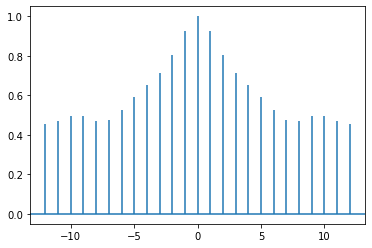

In [28]:
plt.acorr(df1,maxlags=12)

There is high autocorrelation for the demand feature

After also visualising the demand curve, demand is not normally distributed. So we normalise the feature'demand'

In [29]:
#Log normalise the feature 'Demand'

In [30]:
df1=bikes_prep['demand']
df2=np.log(df1)

<AxesSubplot:>

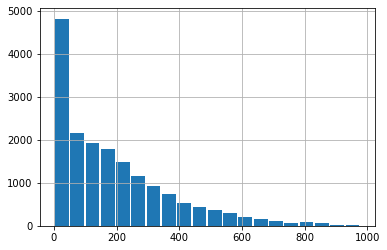

In [31]:
plt.figure()
df1.hist(rwidth=0.9,bins=20)

<AxesSubplot:>

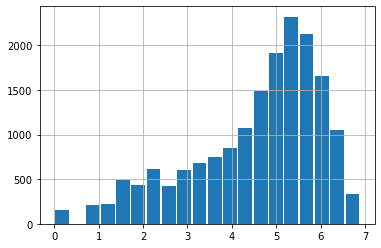

In [32]:
plt.figure()
df2.hist(rwidth=0.9,bins=20)

In [37]:
bikes_prep['demand']=np.log(bikes_prep['demand']) 

In [86]:
bikes_prep['demand'] #Log normalised value the feature 'Demand'

0       -3.932821
1       -1.322567
2       -1.525706
3             NaN
4             NaN
           ...   
17374   -0.804278
17375   -0.900178
17376   -0.896117
17377   -1.060840
17378   -1.182020
Name: demand, Length: 17379, dtype: float64

In [40]:
#Autocorrelation in the ddemand cpolumn

In [87]:
t_1=bikes_prep['demand'].shift(+1).to_frame()
t_1.coulmn=['t-1']

t_2=bikes_prep['demand'].shift(+2).to_frame()
t_2.coulmn=['t-2']

t_3=bikes_prep['demand'].shift(+3).to_frame()
t_3.coulmn=['t-3']

<ipython-input-87-0243ff680962>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  t_1.coulmn=['t-1']
<ipython-input-87-0243ff680962>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  t_2.coulmn=['t-2']
<ipython-input-87-0243ff680962>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  t_3.coulmn=['t-3']


In [83]:
bikes_prep_lag=pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,demand,demand,demand
0,1,1,0,0,1,0.24,0.81,-3.932821,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,-1.322567,-3.932821,NaN,NaN
2,1,1,2,0,1,0.22,0.80,-1.525706,-1.322567,-3.932821,NaN
3,1,1,3,0,1,0.24,0.75,NaN,-1.525706,-1.322567,-3.932821
4,1,1,4,0,1,0.24,0.75,NaN,NaN,-1.525706,-1.322567
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,-0.804278,-0.796893,-0.717239,-0.656159
17375,1,12,20,0,2,0.26,0.60,-0.900178,-0.804278,-0.796893,-0.717239
17376,1,12,21,0,1,0.26,0.60,-0.896117,-0.900178,-0.804278,-0.796893
17377,1,12,22,0,1,0.26,0.56,-1.060840,-0.896117,-0.900178,-0.804278


As per autocorrelation principle, we need three more column(t_1,t_2,t_3) as well, along with these various independent feaures to predict the demand for a particular hour.

In [84]:
bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,demand,demand,demand
13,1,1,13,0,2,0.46,0.72,-0.880621,-0.921742,-1.105089,-1.410584
14,1,1,14,0,2,0.46,0.72,-0.840205,-0.880621,-0.921742,-1.105089
15,1,1,15,0,2,0.44,0.77,-0.828401,-0.840205,-0.880621,-0.921742
16,1,1,16,0,2,0.42,0.82,-0.884387,-0.828401,-0.840205,-0.880621
17,1,1,17,0,2,0.44,0.82,-1.016107,-0.884387,-0.828401,-0.840205
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,-0.804278,-0.796893,-0.717239,-0.656159
17375,1,12,20,0,2,0.26,0.60,-0.900178,-0.804278,-0.796893,-0.717239
17376,1,12,21,0,1,0.26,0.60,-0.896117,-0.900178,-0.804278,-0.796893
17377,1,12,22,0,1,0.26,0.56,-1.060840,-0.896117,-0.900178,-0.804278


In [46]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,demand,demand,demand
13,1,1,13,0,2,0.46,0.72,-0.880621,-0.921742,-1.105089,-1.410584
14,1,1,14,0,2,0.46,0.72,-0.840205,-0.880621,-0.921742,-1.105089
15,1,1,15,0,2,0.44,0.77,-0.828401,-0.840205,-0.880621,-0.921742
16,1,1,16,0,2,0.42,0.82,-0.884387,-0.828401,-0.840205,-0.880621
17,1,1,17,0,2,0.44,0.82,-1.016107,-0.884387,-0.828401,-0.840205
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,-0.804278,-0.796893,-0.717239,-0.656159
17375,1,12,20,0,2,0.26,0.60,-0.900178,-0.804278,-0.796893,-0.717239
17376,1,12,21,0,1,0.26,0.60,-0.896117,-0.900178,-0.804278,-0.796893
17377,1,12,22,0,1,0.26,0.56,-1.060840,-0.896117,-0.900178,-0.804278


Step 7 - Create Dummy Variables and drop first to avoid dummy variables trap using get_dummies.

season,holiday,weather,month,hour

In [48]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
demand      float64
demand      float64
demand      float64
dtype: object

In [51]:
bikes_prep_lag['season']=bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday']=bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather']=bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month']=bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour']=bikes_prep_lag['hour'].astype('category')

bikes_prep_lag=pd.get_dummies(bikes_prep_lag, drop_first=True)

<ipython-input-51-028ceb3f4974>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag['season']=bikes_prep_lag['season'].astype('category')
<ipython-input-51-028ceb3f4974>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag['holiday']=bikes_prep_lag['holiday'].astype('category')
<ipython-input-51-028ceb3f4974>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [52]:
bikes_prep_lag

,temp,humidity,demand,demand,demand,demand,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
13,0.46,0.72,-0.880621,-0.921742,-1.105089,-1.410584,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0.46,0.72,-0.840205,-0.880621,-0.921742,-1.105089,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,0.44,0.77,-0.828401,-0.840205,-0.880621,-0.921742,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16,0.42,0.82,-0.884387,-0.828401,-0.840205,-0.880621,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,0.44,0.82,-1.016107,-0.884387,-0.828401,-0.840205,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,-0.804278,-0.796893,-0.717239,-0.656159,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,-0.900178,-0.804278,-0.796893,-0.717239,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,-0.896117,-0.900178,-0.804278,-0.796893,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,-1.060840,-0.896117,-0.900178,-0.804278,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Step-8 Create Train and test split

Split the X and Y dataset into training and testing set

In [70]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.4, random_state=1234)
#It will take data randomly for train and test data set

If we randomly select the data for training and in that case, our data will lose the autocorelation, which we are using to create additional columns and also to predict the future values. The same thing will happen with test data also. So in such cases, we take part of the data either at the start or at the end  or even in the middle as long as we take the complete data for a particular time period. In this our train data will be 0.7* total row data and remaining will go in the test data.

In [56]:
#demand is the time dependent or time series

In [57]:
Y=bikes_prep_lag[['demand']]
X=bikes_prep_lag.drop(['demand'],axis=1)

In [59]:
X

,temp,humidity,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
13,0.46,0.72,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0.46,0.72,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,0.44,0.77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16,0.42,0.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,0.44,0.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
Y

,demand,demand,demand,demand
13,-0.880621,-0.921742,-1.105089,-1.410584
14,-0.840205,-0.880621,-0.921742,-1.105089
15,-0.828401,-0.840205,-0.880621,-0.921742
16,-0.884387,-0.828401,-0.840205,-0.880621
17,-1.016107,-0.884387,-0.828401,-0.840205
...,...,...,...,...
17374,-0.804278,-0.796893,-0.717239,-0.656159
17375,-0.900178,-0.804278,-0.796893,-0.717239
17376,-0.896117,-0.900178,-0.804278,-0.796893
17377,-1.060840,-0.896117,-0.900178,-0.804278


In [61]:
#create the size for 70% of the total row data in order to maintain the autocolinearity. If we will not do in this way, we will lose the autocorrealation

In [62]:
tr_size=0.7*len(X)

In [63]:
type(tr_size)

float

In [66]:
tr_size=int(tr_size) #converted the tr_size into integer type

In [65]:
type(tr_size)

int

In [68]:
X_train=X.values[0:tr_size]
X_test=X.values[tr_size:len(X)]

Y_train=Y.values[0:tr_size]
Y_test=Y.values[tr_size:len(X)]

Step-9 Fit and score the model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
std_reg=LinearRegression()

In [73]:
std_reg.fit(X_train, Y_train)

LinearRegression()

In [82]:
r2_train=std_reg.score(X_train, Y_train) #Calculated R square value
r2_train

0.5065186360133347

In [81]:
r2_test=std_reg.score(X_test, Y_test) #Calculated R square value
r2_test

0.3881036340266393

In [76]:
Y_predict=std_reg.predict(X_test) #Created Y prediction

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
rmse=math.sqrt(mean_squared_error(Y_test,Y_predict))

In [80]:
rmse

0.2504332666045137